# Capstone Project-Battle of Neighbourhoods with Crime data in NewYork

### 1. Problem statement:
 Crimes now days are increasing day by day and with different level of intensity and versatility. The result is great loss to society in terms of monitory loss, social loss and further it enhances the level of threat against the smooth livelihood in the society. To overcome this problem the computing era can help to reduce the crime or even may be helpful in predicting the crime so that sufficient measures can be taken to minimize the loss to property and life. The crime rate prediction strategies can be applied on historical data available in the police records by examining the data at various angles like reason of crime, frequency of similar kind of crimes at specific location with other parameters to prepare model the crime prediction. It is the major challenge to understand the versatile data available with us then model it to predict the future incidence with acceptable accuracy and further to reduce the crime rate. In this project we are going to find in which particular locations or neighbourhoods are do we need to focus and take certain actions to reduce crimes. Trying to locate patterns among neighbourhoods related to crimes.
Present we consider New York crime data set for analysis along with foursquare locations data.


### 2. Analytical Approach:
Unsupervised learning to  find patterns of crimes in New York city and its neighbourhood places :  K-means clustering will be used to compare crimes


### 3. Data Collection
1.	New York crime data from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243
This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) for all complete quarters from 2016 to 2019.
This data set consists data about neighbourhood name, crime, date ,place  and location details. From this data we can able to extract the no. of crimes in each neighbourhood and stats about crimes etc..

2.	Foursquare api for extacting neighbourhoods and venues details.
The collected data consists of NYC venues with compact metadata like id, name, location, checkins count (total checkins ever done in that venue), users count (total users who have ever checked in), tip count (total number of tips written by users), associated categories, menu, etc. The Foursquare categories span a broad ontology, with the following 10 categories on the first level: (1) Arts and Entertainment, (2) College and University, (3) Event, (4) Food, (5) Nightlife Spot, (6) Outdoors and Recreation, (7) Professional and Other Places, (8) Residence, (9) Shop and Service, (10) Travel and Transport.


Installation of required packages for data collection and Exploration of the data

In [56]:
ny_neigh.head()

,Longitude,Latitude,Neighbourhood,BOROUGH
0,-73.847201,40.894705,Wakefield,Bronx
1,-73.829939,40.874294,Co-op City,Bronx
2,-73.827806,40.887556,Eastchester,Bronx
3,-73.905643,40.895437,Fieldston,Bronx
4,-73.912585,40.890834,Riverdale,Bronx


#### Load and explore the data

In [60]:
ny_neigh.groupby(['BOROUGH']).count()

,Longitude,Latitude,Neighbourhood
BOROUGH,,,
Bronx,49,49,49
Brooklyn,71,71,71
Manhattan,39,39,39
Queens,78,78,78
Staten Island,62,62,62


In [82]:
ny_neigh['BOROUGH']=ny_neigh['BOROUGH'].str.upper()

#### 4. Data preprocessing

In [64]:
Ny_data.isna().sum()

BORO_NM              240
OFNS_DESC             10
CMPLNT_FR_DT           0
SUSP_SEX           82125
SUSP_AGE_GROUP     82125
VIC_SEX                0
VIC_AGE_GROUP          0
Latitude          322048
Longitude         322048
dtype: int64

Filter data with crimes from past 10 years

In [68]:
Ny_data=Ny_data.loc[Ny_data['YEAR']>=2009]

#### Below are the top 10 offences/crimes in Newyork recorded past 10 years

In [150]:
Ny_data['OFFENCE'].value_counts()[0:10]

HARRASSMENT 2                     3471
PETIT LARCENY                     2932
ASSAULT 3 & RELATED OFFENSES      2540
CRIMINAL MISCHIEF & RELATED OF    1399
GRAND LARCENY                     1203
OFF. AGNST PUB ORD SENSBLTY &      998
FELONY ASSAULT                     964
MISCELLANEOUS PENAL LAW            679
ROBBERY                            653
DANGEROUS DRUGS                    614
Name: OFFENCE, dtype: int64

In [152]:
Ny_data.groupby(['BOROUGH']).count()

,OFFENCE,DATE,SUSPECT_SEX,SUSPECT_AGE,VIC_SEX,VIC_AGE,Latitude,Longitude,MONTH,YEAR
BOROUGH,,,,,,,,,,
BRONX,4137,4137,4137,4137,4137,4137,4137,4137,4137,4137
BROOKLYN,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112
MANHATTAN,4514,4514,4514,4514,4514,4514,4514,4514,4514,4514
QUEENS,3301,3301,3301,3301,3301,3301,3301,3301,3301,3301
STATEN ISLAND,714,714,714,714,714,714,714,714,714,714


Extract Location and Neighbourhood and venues,tips,number of checkins data from FoursquareAPI

In [193]:
address = 'New York'
geolocator = Nominatim(user_agent="foursquare")
location = geolocator.geocode(address)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinate of NY are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of NY are 40.7127281, -74.0060152.


### Foursquare Credentials to extract Venues and neighborhoods

In [112]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### run the above function on each neighborhood and create a new dataframe called *NewYork_venues*.


### 5.Data Exploration and Visualization

In [198]:
Ny_df.groupby('BOROUGH')['SUSPECT_AGE'].value_counts()

BOROUGH        SUSPECT_AGE
BRONX          25-44          1476
               UNKNOWN        1323
               18-24           571
               45-64           559
               <18             169
               65+              39
BROOKLYN       UNKNOWN        1851
               25-44          1788
               45-64           670
               18-24           563
               <18             189
               65+              51
MANHATTAN      UNKNOWN        1784
               25-44          1488
               45-64           552
               18-24           491
               <18             148
               65+              51
QUEENS         UNKNOWN        1194
               25-44          1176
               45-64           399
               18-24           380
               <18             113
               65+              39
STATEN ISLAND  25-44           253
               UNKNOWN         225
               18-24            99
               45-64        

##### most of Middle aged (25-44) years people accused in Crimes in all Borough cities

In [199]:
Ny_df.groupby('BOROUGH')['SUSPECT_SEX'].value_counts()

BOROUGH        SUSPECT_SEX
BRONX          M              2572
               F               857
               U               708
BROOKLYN       M              3068
               U              1077
               F               967
MANHATTAN      M              2805
               U               949
               F               760
QUEENS         M              2000
               F               655
               U               646
STATEN ISLAND  M               463
               F               143
               U               108
Name: SUSPECT_SEX, dtype: int64

##### Mens are involved in most of the crimes of all Borough cities of NewYork

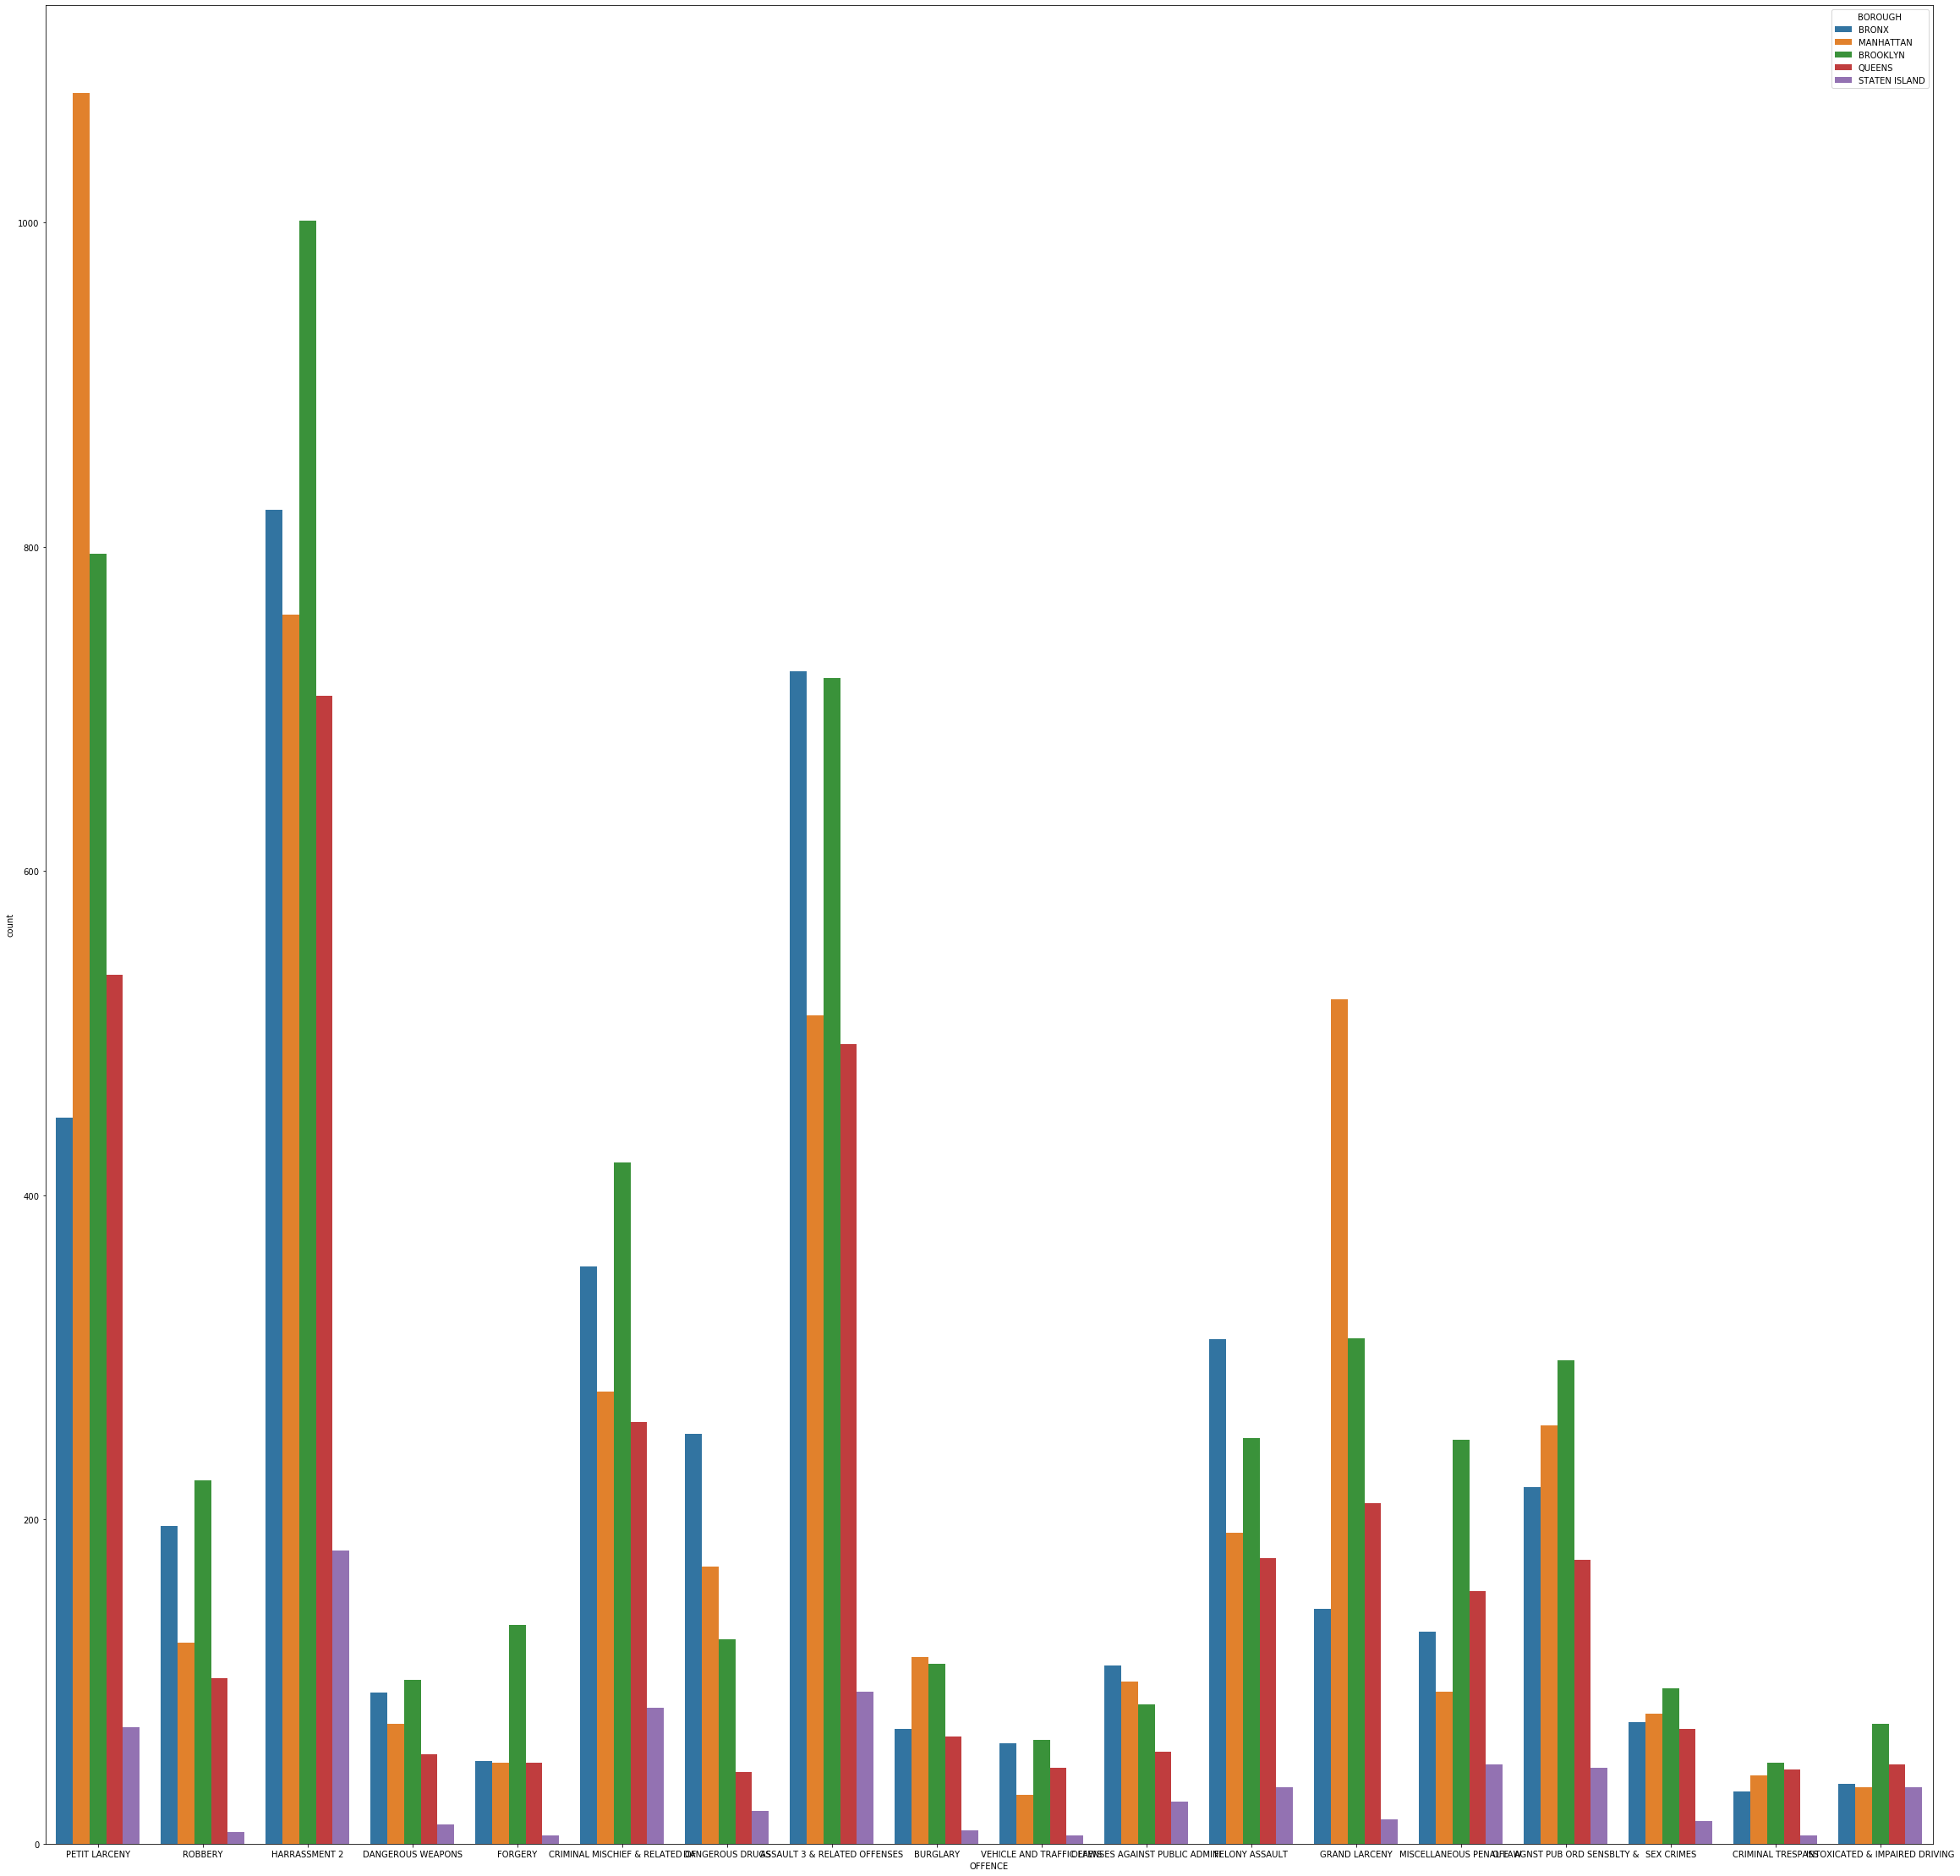

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
sns.countplot("OFFENCE",data=Ny_df,hue="BOROUGH",)
plt.show()


#### From past 10 years most of the happend more in 2019 than 2018 when compared, more crimes are recorded in the city of BROOKLYN
has to analyse the recent crime data of 2018 and 2019

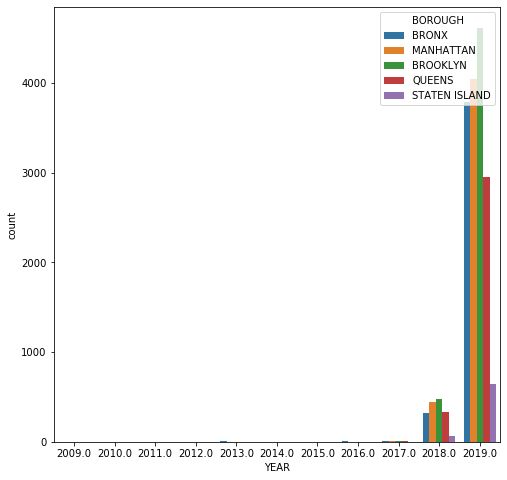

In [207]:
plt.figure(figsize=(8,8))
sns.countplot("YEAR",data=Ny_df,hue="BOROUGH",)
plt.show()

In [208]:
Ny_df=Ny_df.loc[Ny_df['YEAR']>=2018]

In [213]:
Ny_df.drop(['DATE','VIC_SEX','VIC_AGE', 'Latitude', 'Longitude','MONTH'],axis=1,inplace=True)

In [215]:
Ny_df.head()

,BOROUGH,OFFENCE,SUSPECT_SEX,SUSPECT_AGE,YEAR,Neighbourhood
0,BRONX,PETIT LARCENY,M,45-64,2019.0,"Wakefield, Co-op City, Eastchester, Fieldston,..."
1,BRONX,ROBBERY,U,UNKNOWN,2019.0,"Wakefield, Co-op City, Eastchester, Fieldston,..."
2,BRONX,PETIT LARCENY,M,25-44,2019.0,"Wakefield, Co-op City, Eastchester, Fieldston,..."
3,BRONX,HARRASSMENT 2,U,UNKNOWN,2019.0,"Wakefield, Co-op City, Eastchester, Fieldston,..."
4,BRONX,DANGEROUS WEAPONS,M,25-44,2019.0,"Wakefield, Co-op City, Eastchester, Fieldston,..."


In [247]:
final_df=pd.get_dummies(Ny_df, prefix = " ", columns=['OFFENCE', 'SUSPECT_SEX', 'SUSPECT_AGE', 'YEAR'],drop_first=True)
final_df.head()

,BOROUGH,Neighbourhood,_BURGLARY,_CRIMINAL MISCHIEF & RELATED OF,_CRIMINAL TRESPASS,_DANGEROUS DRUGS,_DANGEROUS WEAPONS,_FELONY ASSAULT,_FORGERY,_GRAND LARCENY,_HARRASSMENT 2,_INTOXICATED & IMPAIRED DRIVING,_MISCELLANEOUS PENAL LAW,_OFF. AGNST PUB ORD SENSBLTY &,_OFFENSES AGAINST PUBLIC ADMINI,_PETIT LARCENY,_ROBBERY,_SEX CRIMES,_VEHICLE AND TRAFFIC LAWS,_M,_U,_25-44,_45-64,_65+,_<18,_UNKNOWN,_2019.0
0,BRONX,"Wakefield, Co-op City, Eastchester, Fieldston,...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
1,BRONX,"Wakefield, Co-op City, Eastchester, Fieldston,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
2,BRONX,"Wakefield, Co-op City, Eastchester, Fieldston,...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,BRONX,"Wakefield, Co-op City, Eastchester, Fieldston,...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,BRONX,"Wakefield, Co-op City, Eastchester, Fieldston,...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


#### 6.Clustering of Crimes in neighbourhood places for kmeans clustering algorithm
##### Elbow method: 
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.
Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:
>The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
>The WSS score is the sum of these Squared Errors for all the points.
>Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

We obtain the following plot for WSS-vs-k for our dataset.

<img src="https://miro.medium.com/max/407/1*O_JmBi6rM6PlrPFx_uNrVQ.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [257]:
from numpy import sqrt
wcss=calculate_wcss(cl_data)
kclusters=optimal_number_of_clusters(wcss)
print("optimal number of clusters:",kclusters)


optimal number of clusters: 7


In [258]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cl_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 3, 2, 3, 2, 6, 2, 6, 3, 3], dtype=int32)

In [279]:
Ny_df.groupby(['Cluster_Labels']).agg(lambda x:x.value_counts().index[0])

,BOROUGH,OFFENCE,SUSPECT_SEX,SUSPECT_AGE,YEAR,Neighbourhood
Cluster_Labels,,,,,,
0,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,M,18-24,2019.0,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."
1,MANHATTAN,HARRASSMENT 2,M,UNKNOWN,2019.0,"Marble Hill, Chinatown, Washington Heights, In..."
2,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,M,25-44,2019.0,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."
3,BROOKLYN,GRAND LARCENY,U,UNKNOWN,2019.0,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."
4,BROOKLYN,HARRASSMENT 2,M,45-64,2019.0,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."
5,BROOKLYN,PETIT LARCENY,U,UNKNOWN,2019.0,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."
6,BROOKLYN,HARRASSMENT 2,F,25-44,2019.0,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."


## Conclusion

Above shown table represents Most common offences in each cluster
1. Brooklyn city has the highest most common offences in Newyork
2. The top most offences in neighborhood cities are Assaults, Harrassment, Grand Larceny etc
3. Most of the crimes involved suspects are under the age of 25-44 are men.


In [280]:
Ny_df.groupby(['Cluster_Labels']).agg(lambda x:x.value_counts().index[-1])

,BOROUGH,OFFENCE,SUSPECT_SEX,SUSPECT_AGE,YEAR,Neighbourhood
Cluster_Labels,,,,,,
0,STATEN ISLAND,VEHICLE AND TRAFFIC LAWS,F,65+,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."
1,STATEN ISLAND,DANGEROUS DRUGS,F,UNKNOWN,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."
2,STATEN ISLAND,VEHICLE AND TRAFFIC LAWS,M,25-44,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."
3,STATEN ISLAND,OFFENSES AGAINST PUBLIC ADMINI,F,65+,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."
4,STATEN ISLAND,VEHICLE AND TRAFFIC LAWS,U,45-64,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."
5,STATEN ISLAND,PETIT LARCENY,F,<18,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."
6,STATEN ISLAND,VEHICLE AND TRAFFIC LAWS,U,65+,2018.0,"St. George, New Brighton, Stapleton, Rosebank,..."


5. Above shown table represents least number of offences happen in STALEN ISLAND in NewYork
6. Where female suspects are more involved in offences like Vehical and traffic laws

#### Required Enhancements for analysis
1. Lack of proper neighborhood location or postalcode in the crime data set
2. Crimes may cause due to illiteration areas etc..